# Phys555 Assignment 1 Question 3
Karlee Zammit - V00823093

Q3- Add noise to the MNIST data set (explore the web to find a good example). Compare the explained variance ratio vs. the principle components (plots) and find the best first components so that the added noise is removed/cancelled. Change the amplitude of the noise and have a discussion in the notebook. 

## Introduction

The MNIST dataset contains 60,000 training images and 10,000 testing images of handwritten digits. In this exercise, I will add noise to the training data and perform PCA analysis as described in question one of this assignment. I will then discuss, using the explained variance ratio vs. principle components plots, the number of best first components needed to remove/cancel the noise. I will discuss how this number changes as the noise increases.

To alter the noise, please adjust the value on line 9 and rerun all cells.

In [209]:
# Import the necessary packages 
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
import skimage
import matplotlib.pyplot as plt

## Add Noise to MNIST data

(60000, 784)


Text(0.5, 1.0, 'Noisy Image with Variance of 0.08')

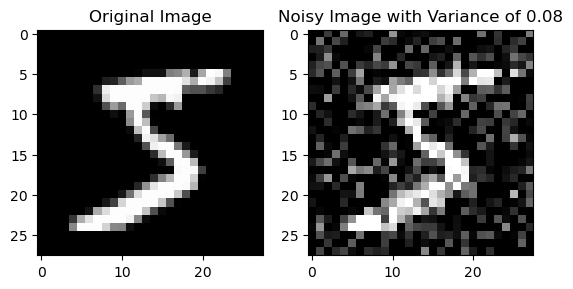

In [232]:
# Load the mnist data
(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()
inp_tr = inp_tr/255.

# flatten the array
inp_tr=np.reshape(inp_tr,(-1,28*28))

# Set the variance value (please adjust this if you'd like to see the difference between different variance values and rerun the rest of the code)
var = 0.08
noisy_images_tr = skimage.util.random_noise(inp_tr, mode='gaussian', seed=None, clip=True, var=var)
print(noisy_images_tr.shape)

# Look at the first image with noise as an example
plt.subplot(1,2,1)
plt.imshow(inp_tr[0].reshape(28,28),cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(noisy_images_tr[0].reshape(28,28),cmap='gray')
plt.title('Noisy Image with Variance of ' + str(var))

## PCA of Non-Noisy Data

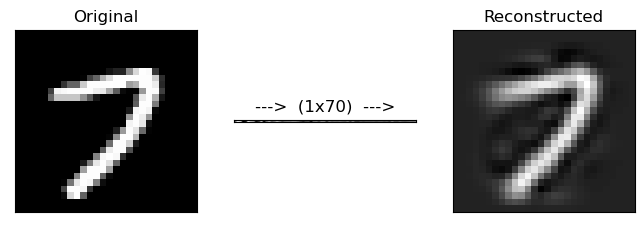

In [233]:
# Not noisy data plots 
n_pic = np.random.choice(np.arange(len(inp_va)))

# going with 250 as a starting point, as it looks to account for approx 90% of the variance of all of the data
# for kc in [20, 50, 200, 250, 300, 400]: 250, 300. and 400 looked very similar
#for kc in [100,150,200,250]:
for kc in [70]:
    n_components=kc
    pca=PCA(n_components=n_components)

    # same thing as fit_transform from q1
    pca.fit(inp_tr)
    inp_tr_pca_orig = pca.transform(inp_tr)
    exp_var_pca_orig = pca.explained_variance_ratio_
    cum_sum_eigenvalues_orig = np.cumsum(exp_var_pca_orig)

    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_tr_pca_orig[n_pic])
    
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(inp_tr[n_pic].reshape(28,28),cmap='gray')
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 3, 2)
    plt.imshow(inp_tr_pca_orig[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('Reconstructed')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## PCA of Noisy Data

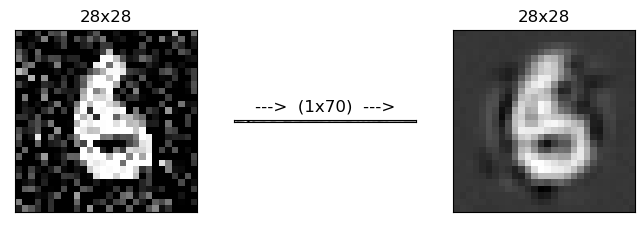

In [234]:
### Noisy data plots
n_pic = np.random.choice(np.arange(len(noisy_images_tr)))

for kc in [70]:
    n_components=kc
    pca=PCA(n_components=n_components)

    # same thing as fit_transform from q1
    pca.fit(noisy_images_tr)
    inp_tr_pca_noisy = pca.transform(noisy_images_tr)
    
    exp_var_pca_noisy = pca.explained_variance_ratio_
    cum_sum_eigenvalues_noisy = np.cumsum(exp_var_pca_noisy)

    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_tr_pca_noisy[n_pic]) # re-construct the image
    fig = plt.figure(n_pic)
    
    plt.subplot(1, 3, 1)
    plt.imshow(noisy_images_tr[n_pic].reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 3, 2)
    plt.imshow(inp_tr_pca_noisy[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Variance Plots

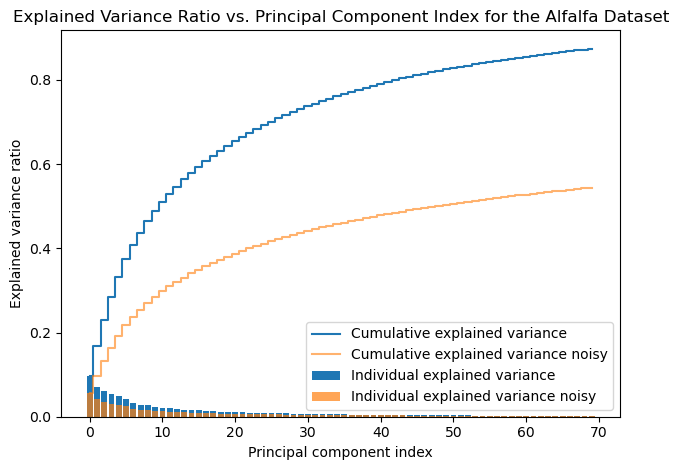

In [235]:
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca_orig)), exp_var_pca_orig, alpha=1, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues_orig)), cum_sum_eigenvalues_orig, where='mid',label='Cumulative explained variance')

plt.bar(range(0,len(exp_var_pca_noisy)), exp_var_pca_noisy, alpha=0.7, align='center', label='Individual explained variance noisy')
plt.step(range(0,len(cum_sum_eigenvalues_noisy)), cum_sum_eigenvalues_noisy, where='mid',label='Cumulative explained variance noisy', alpha=0.6)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Alfalfa Dataset')
plt.tight_layout()
plt.show()

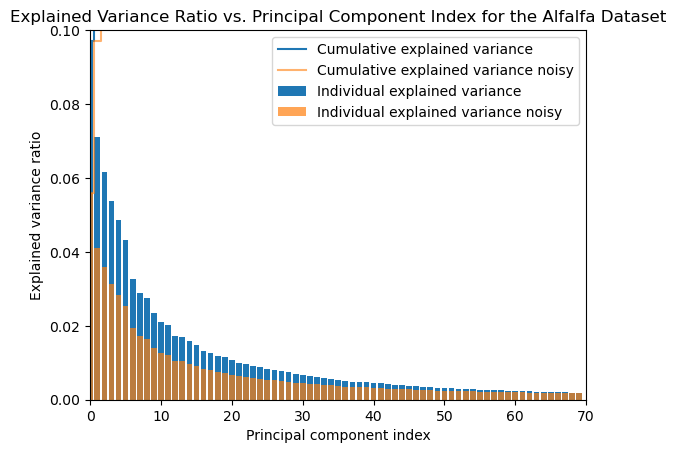

In [236]:
# Create the visualization plot zoomed in 
plt.bar(range(0,len(exp_var_pca_orig)), exp_var_pca_orig, alpha=1, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues_orig)), cum_sum_eigenvalues_orig, where='mid',label='Cumulative explained variance')

plt.bar(range(0,len(exp_var_pca_noisy)), exp_var_pca_noisy, alpha=0.7, align='center', label='Individual explained variance noisy')
plt.step(range(0,len(cum_sum_eigenvalues_noisy)), cum_sum_eigenvalues_noisy, where='mid',label='Cumulative explained variance noisy', alpha=0.6)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance Ratio vs. Principal Component Index for the Alfalfa Dataset')
plt.xlim(0, 70)
plt.ylim(0, 0.1)
plt.show()

## Discussion

As more noise is added to the data, more principal components are needed to describe the data. I ran the above code for variance of 0 (not-noisy data), 0.01, 0.08, and 1. Below I have included a discussion of the results.

### Variance of 0.01 
For noise added with a variance of 0.01, approximately 40 principal components are needed to describe the data accurately. After 40, the noisy and original data have very similar plot shapes, and therefore there is minimal influence from the noise. 

### Variance of 0.08
For noise added with a variance of 0.08, approximately 60 principal components are needed to describe the data accurately. After 60, the noisy and original data have very similar plot shapes, and therefore there is minimal influence from the noise. 

### Variance of 1 
For noise with a variance of 1, there is no dominant principal component. So, with a very high level of noise where the digits are no longer recognizable, all of the principal components are equally important, ie. all of the dimensions are important, and so dimensionality reduction with PCA is not really possible.

## Conclusion
A higher noise in the data means more principal components are necessary to reconstruct the data. I also experimented with very high numbers of principal components, and if you keep too many of them, your reconstructed data will also reconstruct the noise. There is a balance between the minimum amount of components and the maximum amount of components such that the reconstructed data does not include noise, and this number depends on the amount of noise in the input data. In an extreme case, if there is a very high amount of noise in the input data, most, if not all, of the principal components are needed to accurately construct the data. 



## References 

Scikit Learn Documentation on Adding Noise:

https://scikit-image.org/docs/stable/api/skimage.util.html#random-noise

MNIST download from:

https://h1ros.github.io/posts/loading-scikit-learns-mnist-dataset/